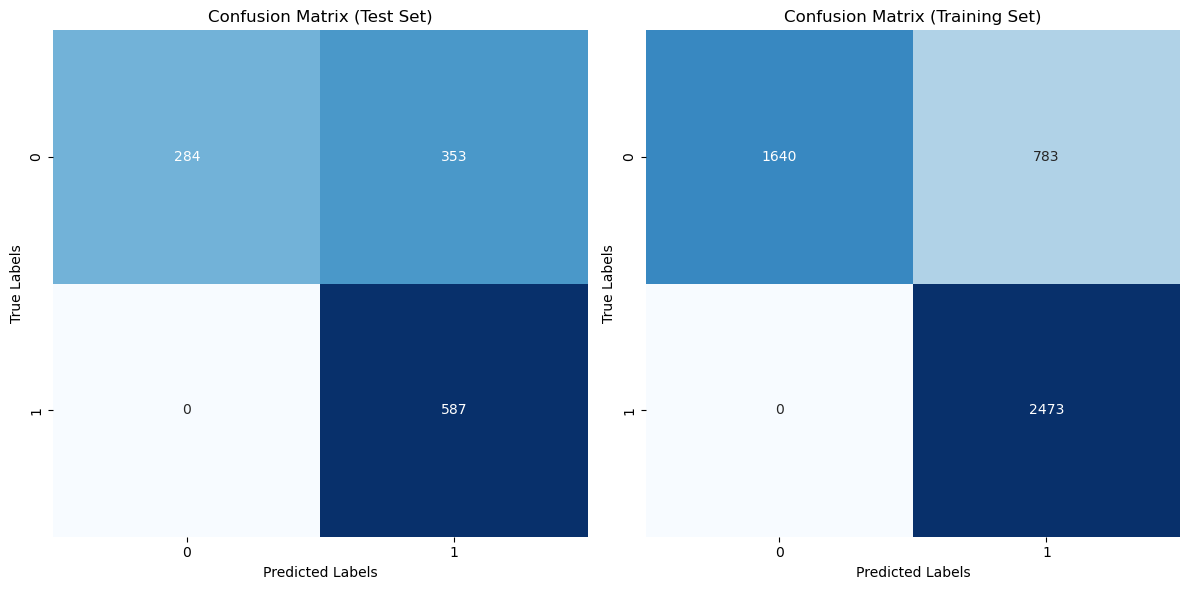

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       1.00      0.45      0.62       637
           1       0.62      1.00      0.77       587

    accuracy                           0.71      1224
   macro avg       0.81      0.72      0.69      1224
weighted avg       0.82      0.71      0.69      1224

Classification Report (Training Set):
               precision    recall  f1-score   support

           0       1.00      0.68      0.81      2423
           1       0.76      1.00      0.86      2473

    accuracy                           0.84      4896
   macro avg       0.88      0.84      0.84      4896
weighted avg       0.88      0.84      0.84      4896

Evaluation of Model Performance:

Training Set Metrics:
               precision    recall  f1-score   support

           0       1.00      0.68      0.81      2423
           1       0.76      1.00      0.86      2473

    accuracy                           0.84      48

In [2]:
#q1
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_excel("C:/Users/Admin/Downloads/trail_dataset.xlsx")

# Convert text columns to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(data['Wow!'].tolist() + data['वाह!'].tolist()).toarray()

# Create labels (y) corresponding to each class
labels = [0] * len(data) + [1] * len(data)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_transformed, labels, test_size=0.2, random_state=42)

# Initialize the kNN classifier with k=3 (as an example)
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict the labels on the test set
y_pred_test = knn.predict(X_test)

# Predict the labels on the training set
y_pred_train = knn.predict(X_train)

# Calculate confusion matrices
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
conf_matrix_train = confusion_matrix(y_train, y_pred_train)

# Plot confusion matrix for test set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Test Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plot confusion matrix for training set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix (Training Set)')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.show()

# Output classification reports
classification_rep_test = classification_report(y_test, y_pred_test)
classification_rep_train = classification_report(y_train, y_pred_train)

print("Classification Report (Test Set):\n", classification_rep_test)
print("Classification Report (Training Set):\n", classification_rep_train)

# Inference: Evaluate model's learning outcome
def evaluate_model_performance(rep_train, rep_test):
    print("Evaluation of Model Performance:\n")
    print("Training Set Metrics:\n", rep_train)
    print("Test Set Metrics:\n", rep_test)
    
    # Extract precision, recall, and F1-score for both sets
    metrics_train = classification_report(y_train, y_pred_train, output_dict=True)
    metrics_test = classification_report(y_test, y_pred_test, output_dict=True)
    
    precision_train = metrics_train['0']['precision'], metrics_train['1']['precision']
    recall_train = metrics_train['0']['recall'], metrics_train['1']['recall']
    f1_train = metrics_train['0']['f1-score'], metrics_train['1']['f1-score']
    
    precision_test = metrics_test['0']['precision'], metrics_test['1']['precision']
    recall_test = metrics_test['0']['recall'], metrics_test['1']['recall']
    f1_test = metrics_test['0']['f1-score'], metrics_test['1']['f1-score']
    
    print(f"Training Set Precision: {precision_train}")
    print(f"Training Set Recall: {recall_train}")
    print(f"Training Set F1-Score: {f1_train}")
    
    print(f"Test Set Precision: {precision_test}")
    print(f"Test Set Recall: {recall_test}")
    print(f"Test Set F1-Score: {f1_test}")

    # Inference based on comparison
    if (f1_train[0] > f1_test[0] and f1_train[1] > f1_test[1]):
        print("The model might be overfitting.")
    elif (f1_train[0] < f1_test[0] and f1_train[1] < f1_test[1]):
        print("The model might be underfitting.")
    else:
        print("The model appears to be fitting well (regular fit).")

evaluate_model_performance(classification_rep_train, classification_rep_test)


In [20]:
#q2
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

# Load the data
file_path = "C:/Users/Admin/Downloads/ml_lab1_excel.xlsx"
df = pd.read_excel(file_path, sheet_name='Purchase data')

print("The original dataframe: ")
print(df.head())

# Filter out the unwanted columns
df = df[['Customer', 'Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)', 'Payment (Rs)']]

print("\nThe filtered dataframe: ")
print(df.head())

# Store selected columns into matrix A and matrix C
A = df[['Candies (#)', 'Mangoes (Kg)', 'Milk Packets (#)']]
C = df[['Payment (Rs)']]

print("\nThe matrices are: ")
print("A = ", A)
print("\nC = ", C)

# Define functions for dimensionality, number of vectors, and rank
def dimensionality(A):
    return A.shape[1]

def no_of_vectors(A):
    return A.shape[0]

def rank(A):
    return np.linalg.matrix_rank(A)

# Pseudo-Inverse calculation
def Pseudo_Inverse(A):
    return np.linalg.pinv(A)

# Predicting the cost
def predicting_the_cost(A):
    A_pseudo_inv = Pseudo_Inverse(A)
    return A_pseudo_inv @ C

# Get predictions
predictions = predicting_the_cost(A)

# Convert DataFrames to numpy arrays and flatten
actual = C.values.flatten()
predicted = predictions.values.flatten()  # Correctly flattening

# Check if lengths are the same
print(f"Length of actual: {len(actual)}")
print(f"Length of predicted: {len(predicted)}")

# Ensure lengths match before calculating metrics
if len(actual) == len(predicted):
    # Calculate MSE, RMSE, MAPE, and R2
    mse = mean_squared_error(actual, predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(actual, predicted)
    r2 = r2_score(actual, predicted)

    print("\nPrediction Results:")
    print("MSE (Mean Squared Error):", mse)
    print("RMSE (Root Mean Squared Error):", rmse)
    print("MAPE (Mean Absolute Percentage Error):", mape)
    print("R2 Score:", r2)
else:
    print("Mismatch in the length of actual and predicted values.")


The original dataframe: 
  Customer  Candies (#)  Mangoes (Kg)  Milk Packets (#)  Payment (Rs)  \
0      C_1           20             6                 2           386   
1      C_2           16             3                 6           289   
2      C_3           27             6                 2           393   
3      C_4           19             1                 2           110   
4      C_5           24             4                 2           280   

   Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  \
0         NaN         NaN         NaN         NaN         NaN  ...   
1         NaN         NaN         NaN         NaN         NaN  ...   
2         NaN         NaN         NaN         NaN         NaN  ...   
3         NaN         NaN         NaN         NaN         NaN  ...   
4         NaN         NaN         NaN         NaN         NaN  ...   

   Unnamed: 12  Unnamed: 13  Unnamed: 14  Unnamed: 15  Unnamed: 16  \
0          NaN          NaN          NaN     

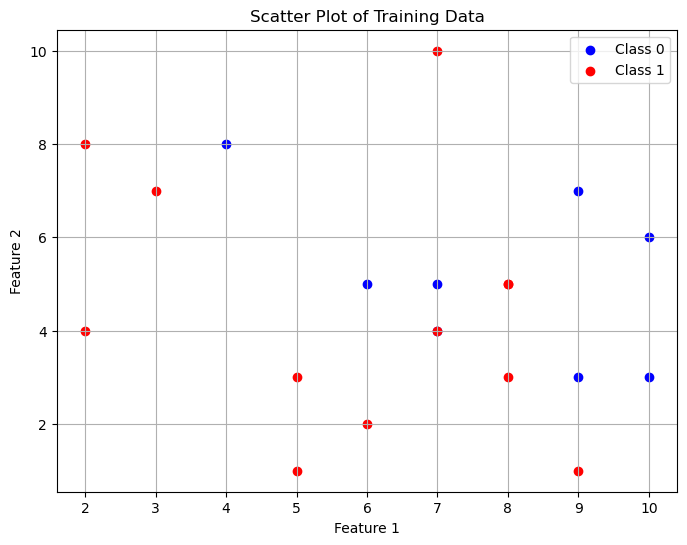

In [3]:
#q3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate 20 random data points with 2 features (X & Y)
X = np.random.randint(1, 11, size=(20, 2))

# Generate labels for 2 classes
# Randomly assign 10 points to class 0 (Blue) and 10 points to class 1 (Red)
y = np.random.choice([0, 1], size=20)

# Create a DataFrame for easier plotting
data = pd.DataFrame(X, columns=['Feature1', 'Feature2'])
data['Class'] = y

# Scatter plot
plt.figure(figsize=(8, 6))

# Plot class 0 (Blue)
plt.scatter(data[data['Class'] == 0]['Feature1'], data[data['Class'] == 0]['Feature2'], color='blue', label='Class 0')

# Plot class 1 (Red)
plt.scatter(data[data['Class'] == 1]['Feature1'], data[data['Class'] == 1]['Feature2'], color='red', label='Class 1')

plt.title('Scatter Plot of Training Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()



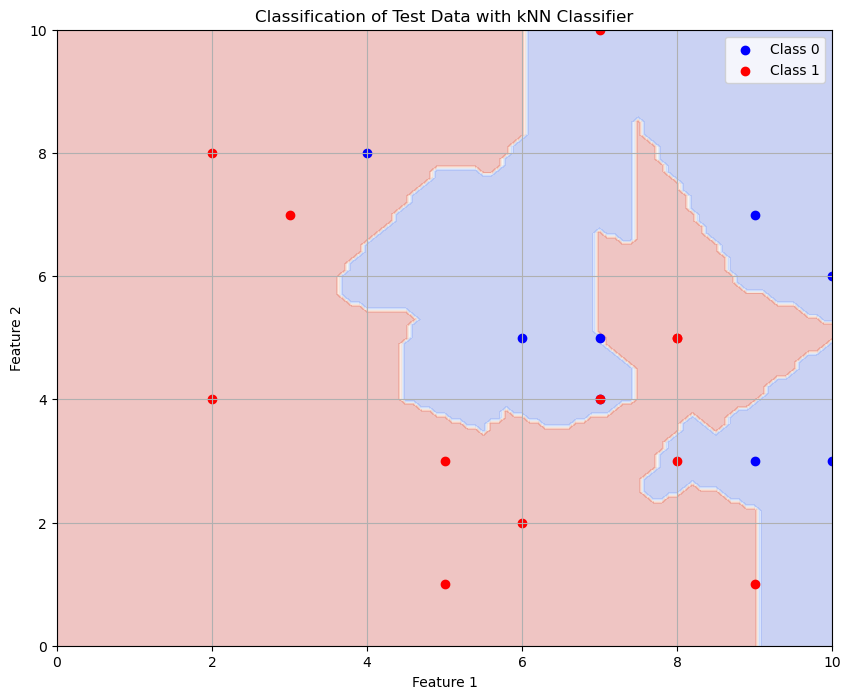

In [4]:
#q4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.random.randint(1, 11, size=(20, 2))
y_train = np.random.choice([0, 1], size=20)

# Create a DataFrame for easier plotting
train_data = pd.DataFrame(X_train, columns=['Feature1', 'Feature2'])
train_data['Class'] = y_train

# Train the kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Generate test set data with values between 0 and 10 with increments of 0.1
x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_range, y_range)
X_test = np.c_[xx.ravel(), yy.ravel()]

# Predict the class of each test point
y_pred = knn.predict(X_test)

# Reshape the predicted labels to match the shape of the mesh grid
y_pred_reshaped = y_pred.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 8))

# Plot decision boundary
plt.contourf(xx, yy, y_pred_reshaped, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot training points
plt.scatter(train_data[train_data['Class'] == 0]['Feature1'], train_data[train_data['Class'] == 0]['Feature2'], color='blue', label='Class 0')
plt.scatter(train_data[train_data['Class'] == 1]['Feature1'], train_data[train_data['Class'] == 1]['Feature2'], color='red', label='Class 1')

plt.title('Classification of Test Data with kNN Classifier')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


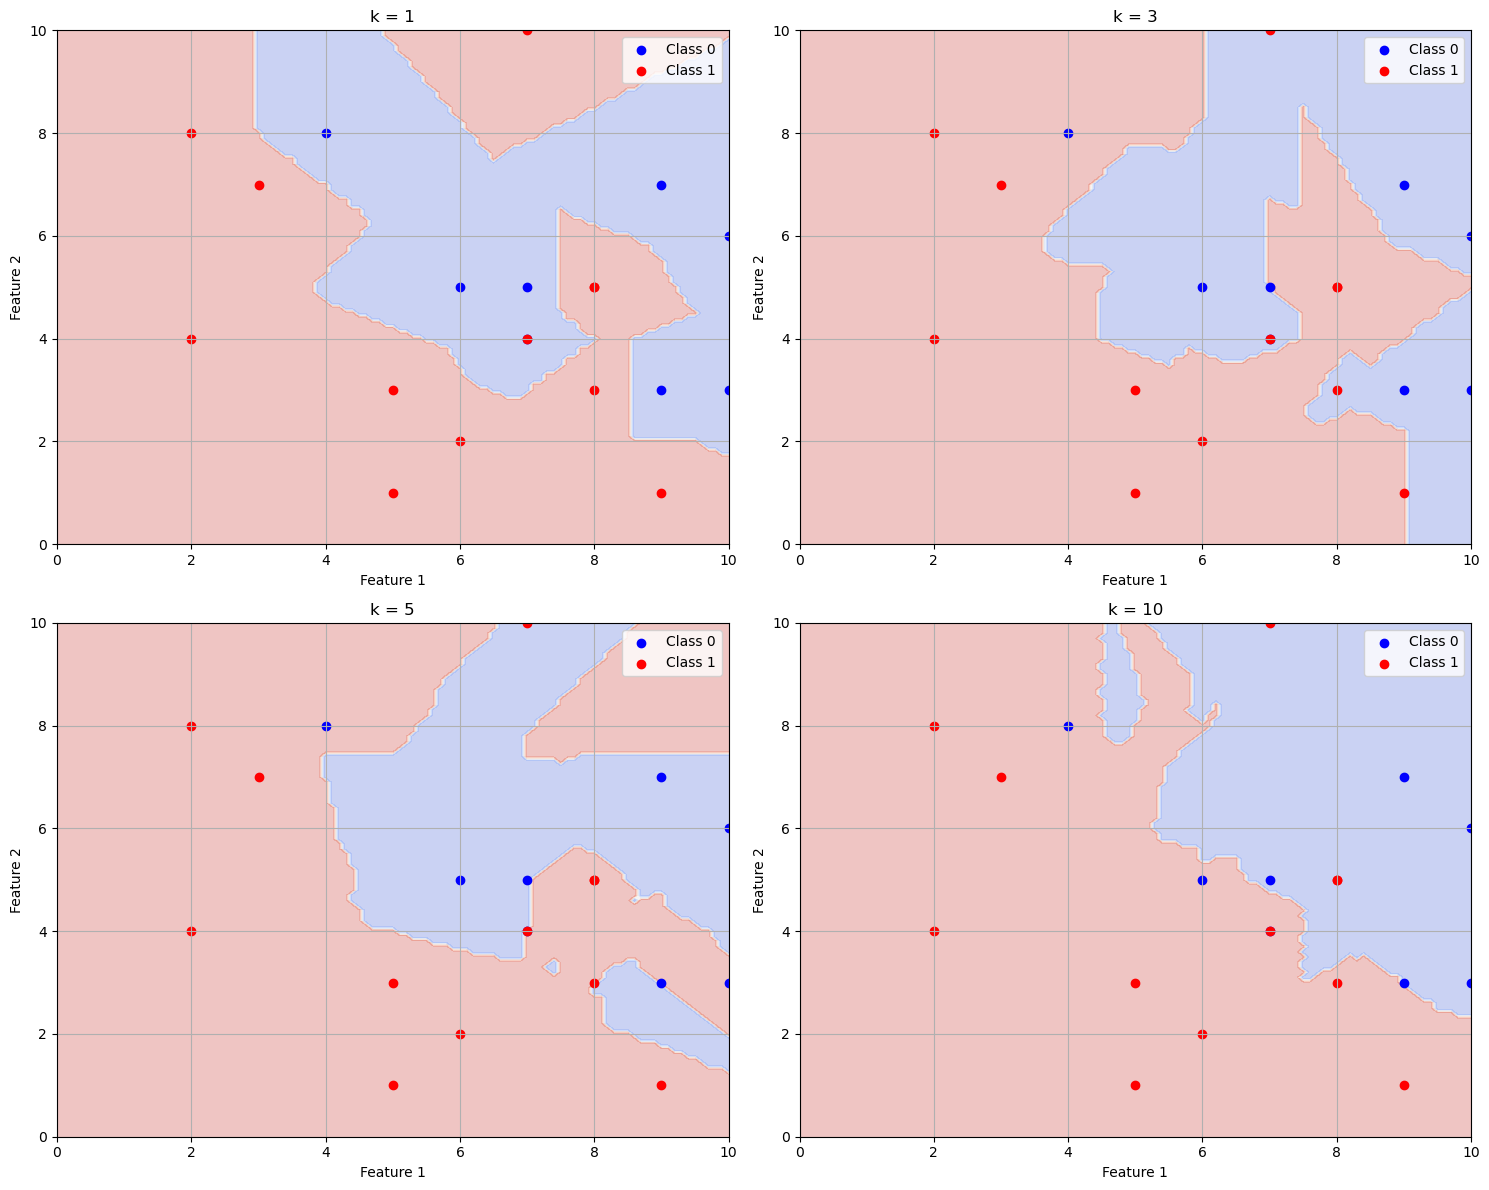

In [5]:
#q5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Seed for reproducibility
np.random.seed(42)

# Generate training data
X_train = np.random.randint(1, 11, size=(20, 2))
y_train = np.random.choice([0, 1], size=20)

# Create a DataFrame for easier plotting
train_data = pd.DataFrame(X_train, columns=['Feature1', 'Feature2'])
train_data['Class'] = y_train

# Generate test set data with values between 0 and 10 with increments of 0.1
x_range = np.arange(0, 10.1, 0.1)
y_range = np.arange(0, 10.1, 0.1)
xx, yy = np.meshgrid(x_range, y_range)
X_test = np.c_[xx.ravel(), yy.ravel()]

# Define k values to test
k_values = [1, 3, 5, 10]

plt.figure(figsize=(15, 12))

for i, k in enumerate(k_values, 1):
    # Train the kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict the class of each test point
    y_pred = knn.predict(X_test)
    
    # Reshape the predicted labels to match the shape of the mesh grid
    y_pred_reshaped = y_pred.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, y_pred_reshaped, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(train_data[train_data['Class'] == 0]['Feature1'], train_data[train_data['Class'] == 0]['Feature2'], color='blue', label='Class 0')
    plt.scatter(train_data[train_data['Class'] == 1]['Feature1'], train_data[train_data['Class'] == 1]['Feature2'], color='red', label='Class 1')
    plt.title(f'k = {k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


    Wow!   वाह!
0  Duck!  झुको!
1  Duck!  बतख़!
2  Help!  बचाओ!
3  Jump.  उछलो.
4  Jump.  कूदो.


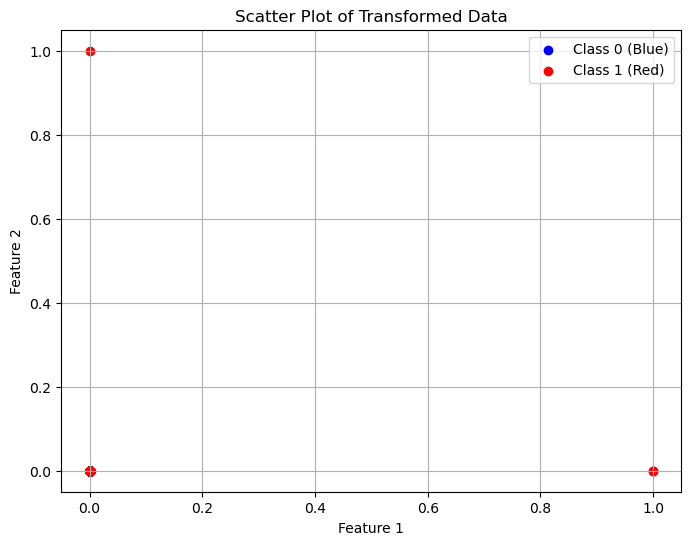

In [8]:
#q6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Load the data from the Excel file
file_path =  "C:/Users/Admin/Downloads/trail_dataset.xlsx" 
data = pd.read_excel(file_path)

# Check the first few rows to understand the structure
print(data.head())

# Combine text columns if they exist
if 'Wow!' in data.columns and 'वाह!' in data.columns:
    texts_combined = data['Wow!'].fillna('') + ' ' + data['वाह!'].fillna('')
else:
    raise ValueError("Expected columns 'Wow!' and 'वाह!' not found in the dataset.")

# Convert text to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(texts_combined).toarray()

# Ensure there are enough samples to split into two classes
num_samples = len(data)
if num_samples % 2 != 0:
    raise ValueError("The number of samples must be even for equal class splitting.")

split_index = num_samples // 2

# Split data into two classes
class_one = X_transformed[:split_index]
class_two = X_transformed[split_index:]

# Create a DataFrame for plotting
# Adding class labels for visualization
class_labels = np.array([0] * split_index + [1] * split_index)
features = np.vstack([class_one, class_two])
plot_data = pd.DataFrame(features, columns=[f'Feature{i+1}' for i in range(features.shape[1])])
plot_data['Class'] = class_labels

# Create scatter plot
plt.figure(figsize=(8, 6))

# Plot Class 0 (Blue)
plt.scatter(plot_data[plot_data['Class'] == 0]['Feature1'], plot_data[plot_data['Class'] == 0]['Feature2'], color='blue', label='Class 0 (Blue)')

# Plot Class 1 (Red)
plt.scatter(plot_data[plot_data['Class'] == 1]['Feature1'], plot_data[plot_data['Class'] == 1]['Feature2'], color='red', label='Class 1 (Red)')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Transformed Data')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
%matplotlib inline

Data preview:
    Wow!   वाह!
0  Duck!  झुको!
1  Duck!  बतख़!
2  Help!  बचाओ!
3  Jump.  उछलो.
4  Jump.  कूदो.
Transformed data shape: (3060, 3096)
Features shape: (3060, 3096)
PCA transformed data shape: (3060, 2)
Scaled data shape: (3060, 2)
Mesh grid shape: (1052, 1138) (1052, 1138)


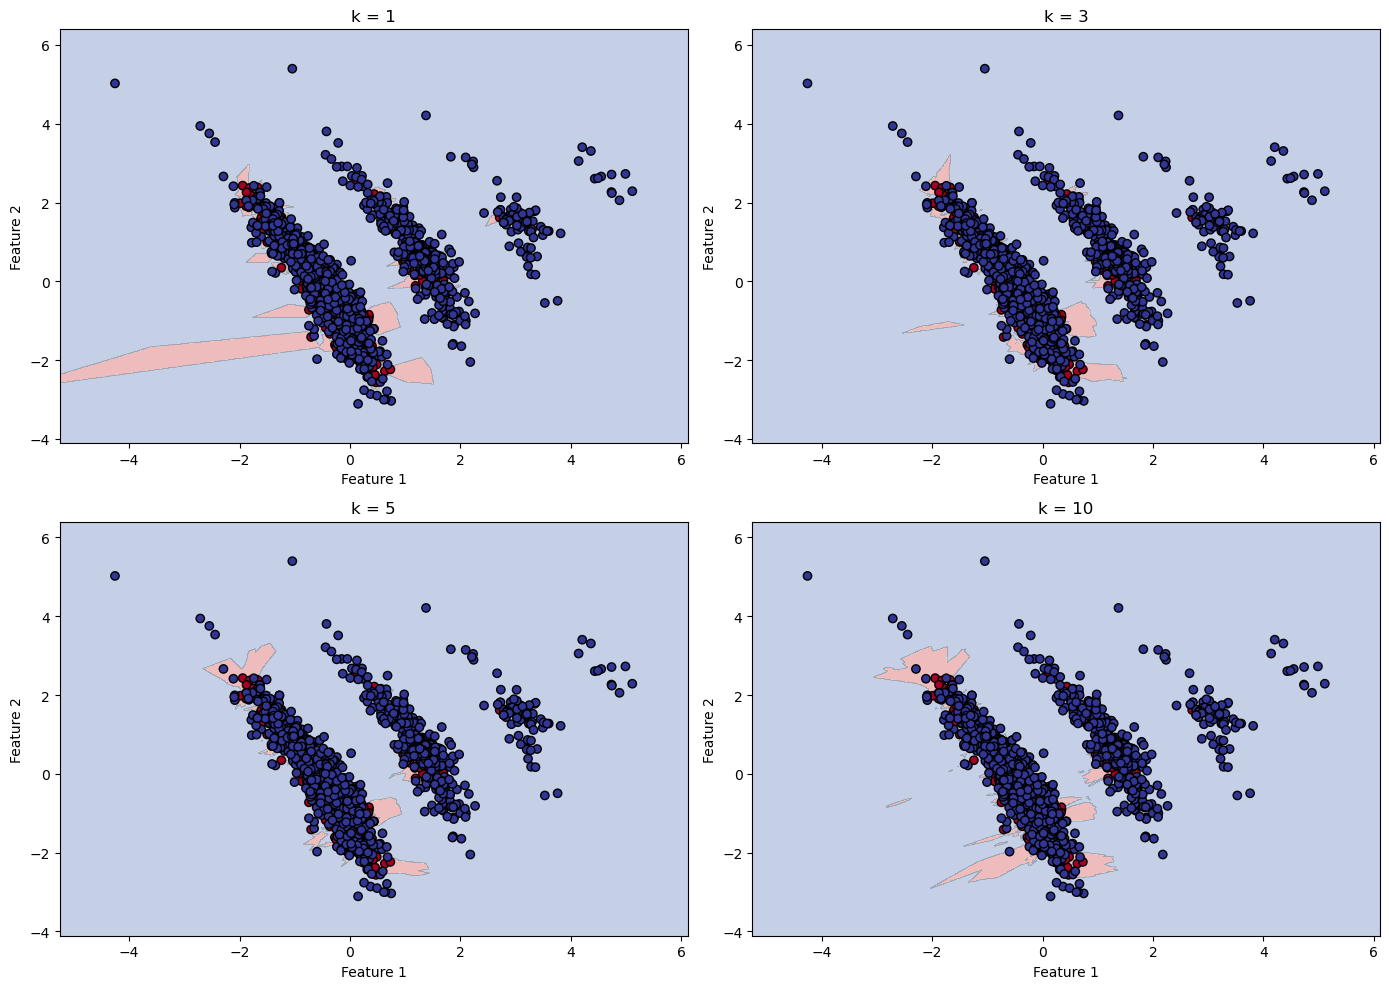

In [13]:
#q6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the data from the Excel file
file_path =  "C:/Users/Admin/Downloads/trail_dataset.xlsx" 
data = pd.read_excel(file_path)

# Check the data
print("Data preview:")
print(data.head())

# Combine text columns if they exist
if 'Wow!' in data.columns and 'वाह!' in data.columns:
    texts_combined = data['Wow!'].fillna('') + ' ' + data['वाह!'].fillna('')
else:
    raise ValueError("Expected columns 'Wow!' and 'वाह!' not found in the dataset.")

# Convert text to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(texts_combined).toarray()

print("Transformed data shape:", X_transformed.shape)

# Ensure there are enough samples to split into two classes
num_samples = len(data)
if num_samples % 2 != 0:
    raise ValueError("The number of samples must be even for equal class splitting.")

split_index = num_samples // 2

# Split data into two classes
class_one = X_transformed[:split_index]
class_two = X_transformed[split_index:]

# Create a DataFrame for plotting
class_labels = np.array([0] * split_index + [1] * split_index)
features = np.vstack([class_one, class_two])
print("Features shape:", features.shape)

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

print("PCA transformed data shape:", X_pca.shape)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

print("Scaled data shape:", X_scaled.shape)

# Define values of k to test
k_values = [1, 3, 5, 10]

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

print("Mesh grid shape:", xx.shape, yy.shape)

# Plotting
plt.figure(figsize=(14, 10))

for i, k in enumerate(k_values, start=1):
    plt.subplot(2, 2, i)
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_scaled, class_labels)
    
    # Predict on grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary and scatter plot
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=class_labels, edgecolor='k', cmap=plt.cm.RdYlBu)
    plt.title(f'k = {k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best k value: 19
Best accuracy score: 0.642156862745098


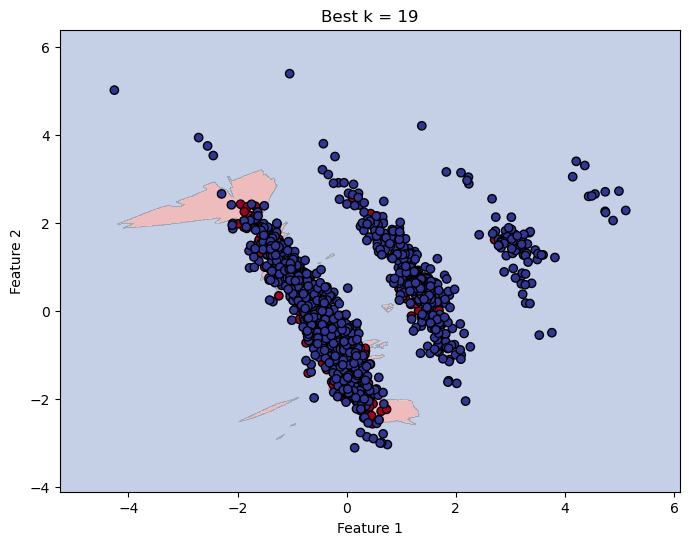

In [15]:
#q7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Load the data from the Excel file
file_path =  "C:/Users/Admin/Downloads/trail_dataset.xlsx" 
data = pd.read_excel(file_path)

# Combine text columns if they exist
if 'Wow!' in data.columns and 'वाह!' in data.columns:
    texts_combined = data['Wow!'].fillna('') + ' ' + data['वाह!'].fillna('')
else:
    raise ValueError("Expected columns 'Wow!' and 'वाह!' not found in the dataset.")

# Convert text to numerical data (Bag of Words)
vectorizer = CountVectorizer()
X_transformed = vectorizer.fit_transform(texts_combined).toarray()

# Ensure there are enough samples to split into two classes
num_samples = len(data)
if num_samples % 2 != 0:
    raise ValueError("The number of samples must be even for equal class splitting.")

split_index = num_samples // 2

# Split data into two classes
class_one = X_transformed[:split_index]
class_two = X_transformed[split_index:]

# Create a DataFrame for plotting
class_labels = np.array([0] * split_index + [1] * split_index)
features = np.vstack([class_one, class_two])

# Apply PCA to reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

# Define parameter distribution for RandomizedSearchCV
param_dist = {'n_neighbors': randint(1, 20)}

# Initialize kNN classifier
knn = KNeighborsClassifier()

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=knn, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', verbose=1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_scaled, class_labels)

# Get the best parameters and best score
best_k = random_search.best_params_['n_neighbors']
best_score = random_search.best_score_

print(f"Best k value: {best_k}")
print(f"Best accuracy score: {best_score}")

# Optionally, plot the best kNN model
plt.figure(figsize=(8, 6))
clf = KNeighborsClassifier(n_neighbors=best_k)
clf.fit(X_scaled, class_labels)

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict on grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and scatter plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=class_labels, edgecolor='k', cmap=plt.cm.RdYlBu)
plt.title(f'Best k = {best_k}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
